In [247]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

In [248]:
## Let's start by loading our data

# Starting with the labels
with open("./data/processed_training_labels.csv") as labels_file:
    labels_string = labels_file.read()
    labels = np.array(labels_string.split(','), dtype=int)
    
# Recall we had 60000 images. Let's make sure we didn't lose anythin
assert len(labels) == 60000

# Now for the images
images = []
with open("./data/processed_training_images") as images_file:
    raw_image_strings = images_file.readlines()
    for img_string in raw_image_strings:
        img_flat = np.array(img_string.split(","), dtype=np.double)
        img = np.reshape(img_flat, (28,28))
        images.append(img)
        
# Again, let's do some random spot checking to make sure everything is as we expect
assert len(images) == 60000
i1,i2,i3 = np.random.randint(0, 60000, 3)
assert images[i1].shape == (28,28)
assert images[i2].shape == (28,28)
assert images[i3].shape == (28,28)

In [ ]:
# And again, we'll just print out some images and their labels for good measure 

fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,4,1)
plt.text(9,40,f"label: {labels[i1]}")
plt.imshow(images[i1], cmap='gray')
fig.add_subplot(1,4,2)
plt.text(10,40,f"label: {labels[i2]}")
plt.imshow(images[i2], cmap='gray')
fig.add_subplot(1,4,3)
plt.text(11,40,f"label: {labels[i3]}")
plt.imshow(images[i3], cmap='gray')

In [249]:
## Okay! Now the fun begins.
# To start, let's just get everything over to Torch
t_labels = torch.tensor(labels).long()
t_images = torch.tensor(images)

train_images = t_images.reshape(60000, 1, 784).float()
train_labels = torch.zeros(60000, 1, 10)
for i, label in enumerate(t_labels):
    train_labels[i][0][label.item()] = 1

#train_labels = train_labels.flip(0)
#train_images = train_images.flip(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])


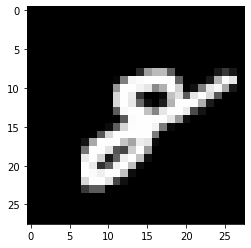

In [31]:
# And we can take a look at their shapes
import matplotlib.pyplot as plt
z = np.random.randint(0, 60000)
plt.imshow(train_images[z][0].reshape(28,28), cmap='gray')
print(train_labels[z][0])

In [493]:
# TODO: !DF! Try just one fully connected layer
# TODO: !DF! Write explanation on MSELoss()
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(1,1,3)  # stride = 1
        #self.drop1 = nn.(389,p=.2) 
        self.fc1 = nn.Linear(782*2,100) # 80
        #self.drop2 = nn.Dropout()
        self.fc2 = nn.Linear(100, 10)
        #self.fc3 = nn.Linear(100, 10) # 80
        
    def forward(self, x):
        #x = F.max_pool1d(F.sigmoid(self.conv1(x)), (2))  ## TODO: Test this again against whatever you leave here
        x = F.sigmoid(self.conv1(x))
        #x = x.view(-1, x.shape[1:].numel())
        #x = self.drop1(x)
        x = x.view(-1, x.shape[1:].numel())  # Linear input should be in shape [batch_size, features x height x width]
        x = F.sigmoid(self.fc1(x))
        
        
        #x = F.sigmoid(self.fc2(x))
        #x = self.drop2(x)
        #x = F.relu(self.fc2(x))
        # What we're doing here is re-shaping x to remove the channel dimension. This was confusing for me to understand. But
        # basically pytorch expects everything in mini batches. So incoming data is in the form (images_per_batch,
        # channels_per_image, (h,w)). In our case, we have (4,1,784), because we have 4 images per batch, 1 channel per image,
        # and a flat vector of length 784 representing that channel (and because we have only one channel, that image). Our
        # output, however, is channel indepedent. We want our output to be in the shape (images_per_batch,
        # {single_image_output_shape}). In that case, our final output shape is (4, 10)
        return self.fc2(x)

## 100 -> ~76 ~78 ~78 ~78%
## 80 -> ~78 ~76 ~ 77 ~78%

## 100 with max_pool -> 71%, 73% 71%
#https://discuss.pytorch.org/t/how-are-layer-weights-and-biases-initialized-by-default/13073
# 5 Epochs with +-[1/sqrt(n)] weights + pytorch bias, Sigmoid, Kernel Size 3: 85%, 86%, 86%
# 5 Epochs with pytorch weights/bias, Sigmoid, Kernel Size 3: 87%, 86%, 86%, 85%
# 5 Epochs with +-[1/sqrt(n)] weights + 0 bias, Sigmoid, Kernel Size 3: 86%, 86%, 86%, 85%
# 5 Epochs with +-[1/sqrt(n)] weights and bias, Sigmoid, Kernel Size 3: 86%, 85%, 86%
#  5 Epochs with Normalized Xavier weights and 0 bias, Sigmoid, Kernel Size 3: 87%, 87%, 86%,(5) -- 90.35% 90.44%  (10) **
#  5 Epochs with Normalized Xavier weights and 0 bias, Sigmoid, Kernel Size 5: 86%, 86%, 86% (5) -- 89.31% 90.03%  (10)
#  5 Epochs with Normalized Xavier weights and 0 bias, Sigmoid, Kernel Size 8: 87%, 86%, 87% (5) -- 89.79% 88.58%  (10)

## TODO: !DF! Best of the normalized Xavier head-to-head with pytorch defaults, 10 epochs, track loss

In [490]:
net = Net()
net = net
# https://stackoverflow.com/questions/49433936/how-to-initialize-weights-in-pytorch
# https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/
# TODO:!DF! test with and without these weights
#net.fc1.weight.data.uniform_(-1.0/np.sqrt(782),1.0/np.sqrt(782))
#_ = net.fc2.weight.data.uniform_(-1.0/np.sqrt(100),1.0/np.sqrt(100))
#net.fc1.bias.data.uniform_(-1.0/np.sqrt(782),1.0/np.sqrt(782))
#_ =  net.fc2.bias.data.uniform_(-1.0/np.sqrt(100),1.0/np.sqrt(100))-np.sqrt(6.0)


In [506]:
from IPython.display import display, clear_output
criterion = nn.MSELoss()
criterion2 = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.01)
training_outs = []
for training_run in range(5):
    net = Net()
    net.fc1.bias.data.fill_(0)
    net.fc2.bias.data.fill_(0)
    net.fc1.weight.data.uniform_(-np.sqrt(6.0)/np.sqrt(782+100),np.sqrt(6.0)/np.sqrt(782+100))
    _ = net.fc2.weight.data.uniform_(-np.sqrt(6.0)/np.sqrt(100+10),np.sqrt(6.0)/np.sqrt(100+10))
    for epoch in range(5):
        running_loss = 0.0
        for i in range(0,len(train_images), 4):
            net.zero_grad()
            out = net.forward(train_images[i:i+4])
            #loss = criterion(out, train_labels[i:i+4])
            loss = criterion2(out, t_labels[i:i+4])
            loss.backward()
            running_loss += loss.item()
            if i % 2000 == 0:
                ## I recommend doing things like this. It helped me catch mistakes
                #print(batch[0][0])
                #plt.imshow(batch[0][0].reshape((28,28)), cmap='gray')
                #plt.show()
                #print(targets[0])
                clear_output(wait=True)
                display(f"Training Run: {training_run}, Epoch: {epoch}, Batch: {i}, running_loss: {running_loss}")
                running_loss = 0.0
            for f in net.parameters():
                f.data.sub_(f.grad.data * 0.01)
    correct = []
    for i,img in enumerate(test_imgs):
        res = torch.argmax(net(img.flatten().float().unsqueeze(0).unsqueeze(0)))
        targ = test_labels[i]
        if res == targ:
            correct.append(1)
        else:
            correct.append(0)
    training_outs.append(sum(correct))

'Training Run: 4, Epoch: 4, Batch: 58000, running_loss: 57.149008901556954'

In [505]:
import copy
#default_wb_results = copy.deepcopy(training_outs)
norm_xav_wb_results = copy.deepcopy(training_outs)

9469.2


9485.4

In [ ]:
torch.argmax(net(t_images[750].flatten().float().unsqueeze(0).unsqueeze(0)))

In [56]:
losses.flatten().flatten()

tensor([27.0296, 20.4730, 19.2990, 18.5638, 17.8782, 17.0853, 16.1400, 15.1221,
        14.1541, 13.2988])

In [312]:
t.view(4,10)

tensor([[ 0.1536,  0.2882, -0.4127, -0.0651,  0.3566,  0.1120, -0.2545,  0.0706,
         -0.7031, -0.1304],
        [ 0.1242,  0.2807, -0.4189, -0.0767,  0.3486,  0.1419, -0.2370,  0.0854,
         -0.6636, -0.1226],
        [ 0.1348,  0.2714, -0.3890, -0.0232,  0.3746,  0.1413, -0.2490,  0.0728,
         -0.6497, -0.1143],
        [ 0.0769,  0.2961, -0.3989, -0.0508,  0.3697,  0.1184, -0.2663,  0.0687,
         -0.6492, -0.1373]], grad_fn=<ViewBackward>)

In [257]:
with open("./data/processed_testing_labels.csv") as labels_file:
    labels_string = labels_file.read()
    testing_labels = np.array(labels_string.split(','), dtype=int)
    
# Recall we had 60000 images. Let's make sure we didn't lose anythin
assert len(testing_labels) == 10000

# Now for the images
testing_images = []
with open("./data/processed_testing_images") as images_file:
    raw_image_strings = images_file.readlines()
    for img_string in raw_image_strings:
        img_flat = np.array(img_string.split(","), dtype=np.double)
        img = np.reshape(img_flat, (28,28))
        testing_images.append(img)

In [258]:
t_test_labels = torch.tensor(testing_labels)
t_test_images = torch.tensor(testing_images)

In [492]:
test_imgs = t_test_images
test_labels = t_test_labels
correct = []
for i,img in enumerate(test_imgs):
    res = torch.argmax(net(img.flatten().float().unsqueeze(0).unsqueeze(0)))
    targ = test_labels[i]
    if res == targ:
        correct.append(1)
    else:
        correct.append(0)

print(f"{sum(correct)} / {len(correct)}")

9376 / 10000


In [ ]:
img = t_test_images[9496]
plt.imshow(img, cmap='gray')

In [ ]:
torch.argmax(net(img.flatten().float().unsqueeze(0).unsqueeze(0)))

In [268]:
out[0].view(-1)

tensor([-1.1050,  0.4207,  0.8344,  8.9818, -2.0588,  2.4454, -7.6334, -3.6497,
         2.2114, -0.3338], grad_fn=<ViewBackward>)

In [183]:
torch.argmax(out, dim=2)

tensor([[9],
        [3],
        [8],
        [2]])

In [ ]:
##torch.save(net, "./models/1dC2fc85")
##torch.save(net.state_dict(), "./models/1dC2fc85.state_dict")

In [ ]:
train_labels.flip(0)

In [ ]:
my_img = train_images[0][0]
my_conv1d = nn.Conv1d(1,2,2)
my_conv1d(my_img.unsqueeze(0).unsqueeze(0))[0]


In [ ]:
f = nn.Conv1d(1,1,3)

In [ ]:
f(train_images[0].unsqueeze(0)).shape

In [ ]:
104/26

In [68]:
ll = nn.Linear(782,100)
ll2 = nn.Linear(782, 100)
ll2.weight.data.uniform_(-1.0/np.sqrt(782),1.0/np.sqrt(782))

tensor([[-0.0344, -0.0227, -0.0099,  ...,  0.0357,  0.0121, -0.0129],
        [-0.0289, -0.0260, -0.0018,  ...,  0.0205, -0.0217,  0.0199],
        [ 0.0091,  0.0305,  0.0191,  ..., -0.0006,  0.0047, -0.0305],
        ...,
        [-0.0057,  0.0190, -0.0134,  ..., -0.0067,  0.0096, -0.0161],
        [ 0.0202, -0.0128, -0.0338,  ..., -0.0176, -0.0176,  0.0211],
        [-0.0263, -0.0035,  0.0092,  ..., -0.0211, -0.0109, -0.0111]])

In [69]:
ll.weight.data.median()

tensor(3.6307e-05)

In [70]:
ll2.weight.data.median()

tensor(-8.7258e-05)

In [82]:
ll.weight.size(1)

782

In [357]:
out.shape

torch.Size([4, 10])

In [14]:
losses.shape

(5, 15000, 1)

In [18]:
losses[0][0] = 1

In [410]:
out.shape.numel()

40

In [19]:
losses[0][0]

1.0

In [453]:
out.size()[2:]

torch.Size([10])

In [455]:
t_labels.size()[1:]

torch.Size([])